# Swiggy data analysis 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url='https://www.swiggy.com/hyderabad/biryani-collection'

page = requests.get(url)
content = page.content

soup = BeautifulSoup(content)

soup.prettify()

# creating empty list for features.
name=[]
type_=[]
rating = []
time=[]
amount =[]

res_name = soup.find_all('div',class_="nA6kb")

for res_name in soup.find_all('div',class_ = "nA6kb"):
    print(res_name.text)
    name.append(res_name.text)

for res_time in soup.find_all('div',class_ = '_3Mn31'):
    print(res_time.text)
    time.append(res_time.text)

for res_amount in soup.find_all('div',class_ = "nVWSi"):
    print(res_amount.text)
    amount.append(res_amount.text)

for i in soup.find_all('div',class_='_1gURR'):
    type_.append(i.text)

len(rating)

In [2]:
# creating empty list for features.
name=[]
type_=[]
rating = []
time=[]
amount =[]
for page in range(1,30):
    url = 'https://www.swiggy.com/hyderabad?page={}'.format(page)
    page = requests.get(url)
    soup = BeautifulSoup(page.content)
    for res_name in soup.find_all('div',class_ = "nA6kb"):
        name.append(res_name.text)
    for res_time in soup.find_all('div',class_ = '_3Mn31'):
        time.append(res_time.text)
    for i in soup.find_all('div',class_='_1gURR'):
        type_.append(i.text)

# Biryani's

In [3]:
d = {'Restaurant':name,
    'Type':type_,
    
    'Time':time}

In [4]:
df= pd.DataFrame(d)

In [5]:
len(type_)

464

df['type_of_restaurants'] = 'biryani_hotels'

df['rating'] = df['Time'].apply(lambda x:x.split('•')[0])

df['price'] = df['Time'].apply(lambda x:x.split('•')[2])

df['time'] = df['Time'].apply(lambda x:x.split('•')[1])

df['biryani_available'] = df['Type'].apply(lambda x: 'yes' if 'Biryani' in x else 'no')

# CSV IMPORT

In [6]:
df.to_csv('swiggy_biryani.csv')

# North indian - cuisine

url = 'https://www.swiggy.com/hyderabad/north-indian-collection'

page = requests.get(url)
content = page.content

soup = BeautifulSoup(content)

soup.prettify()

res_name = soup.find_all('div',class_='nA6kb')

for res_name in soup.find_all('div',class_ = "nA6kb"):
    print(res_name.text)
    name.append(res_name.text)

for res_time in soup.find_all('div',class_ = '_3Mn31'):
    print(res_time.text)
    time.append(res_time.text)

for res_amount in soup.find_all('div',class_ = "nVWSi"):
    print(res_amount.text)
    amount.append(res_amount.text)

for i in soup.find_all('div',class_='_1gURR'):
    type_.append(i.text)

In [7]:
# creating empty list of features.

name=[]
type_=[]
rating = []
time=[]
amount =[]
for page in range(1,30):
    url = 'https://www.swiggy.com/hyderabad/north-indian-collection?page={}'.format(page)
    page = requests.get(url)
    soup = BeautifulSoup(page.content)
    for res_name in soup.find_all('div',class_ = "nA6kb"):
           name.append(res_name.text)
    for res_time in soup.find_all('div',class_ = '_3Mn31'):
            time.append(res_time.text)
    for i in soup.find_all('div',class_='_1gURR'):
            type_.append(i.text)

In [8]:
d1 = {'Restaurant':name,
    'Type':type_,
      'Time':time}

In [9]:
len(rating)

0

In [10]:
df1 = pd.DataFrame(d1)

df1['type_of_restaurants'] = 'north_indian'

df1['rating'] = df1['Time'].apply(lambda x:x.split('•')[0])

df1['price'] = df1['Time'].apply(lambda x:x.split('•')[2])

df1['time'] = df1['Time'].apply(lambda x:x.split('•')[1])

df1['Chinese_available']= df1['Type'].apply(lambda x:'yes'if 'Chinese'in x else'no')

df1['Continental_available']= df1['Type'].apply(lambda x: 'yes' if 'Continental' in x else 'no')

df1['Tandoor_available']=df1['Type'].apply(lambda x: 'yes' if 'Tandoor' in x else 'no' )

In [11]:
df1

,Restaurant,Type,Time
0,Maalgaadi by Dhaba Estd 1986 Delhi,"North Indian, Indian, Biryani, Punjabi, Kebabs...",4.1•30 MINS•₹300 FOR TWO
1,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0•34 MINS•₹600 FOR TWO
2,The Bowl Concepts,"North Indian, Indian",4.0•31 MINS•₹300 FOR TWO
3,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",3.9•31 MINS•₹300 FOR TWO
4,Raja Rani Ruchulu,"Biryani, Indian, Chinese, Tandoor, North India...",4.0•37 MINS•₹300 FOR TWO
...,...,...,...
291,Dca cafe & Bistro,"Arabian, North Indian, Thalis",--•28 MINS•₹500 FOR TWO
292,Oolta Tawa,North Indian,3.5•39 MINS•₹200 FOR TWO
293,Air Live,"Tandoor, Pizzas, North Indian, Fast Food, Chinese",--•45 MINS•₹700 FOR TWO
294,Telangana Hotel,"Indian, Chinese, North Indian",--•42 MINS•₹350 FOR TWO


# CSV IMPORT

In [12]:
df1.to_csv('swiggy_northindian.csv')

# Top rated restaurants

url = 'https://www.swiggy.com/hyderabad/top-rated-collection'

page = requests.get(url)
content = page.content

soup = BeautifulSoup(content)

res_name = soup.find_all('div',class_='nA6kb')

for res_name in soup.find_all('div',class_='nA6kb'):
    print(res_name.text)
    name.append(res_name.text)

res_time = soup.find_all('div',class_= '_3Mn31')

for res_time in soup.find_all('div',class_ = '_3Mn31'):
    print(res_time.text)
    time.append(res_time.text)

res_amount = soup.find_all('div',class_='nVWSi')

for res_amount in soup.find_all('div',class_ = "nVWSi"):
    print(res_amount.text)
    amount.append(res_amount.text)

for i in soup.find_all('div',class_='_1gURR'):
    type_.append(i.text)

In [13]:
#creating a new empty list.
name =[]
type_=[]
time = []
rating = []
price = []
for page in range(1,30):
    url = 'https://www.swiggy.com/hyderabad/top-rated-collection?page={}'.format(page)
    page = requests.get(url)
    soup = BeautifulSoup(page.content)
    for res_name in soup.find_all('div',class_ = "nA6kb"):
           name.append(res_name.text)
    for res_time in soup.find_all('div',class_ = '_3Mn31'):
            time.append(res_time.text)
    for i in soup.find_all('div',class_='_1gURR'):
            type_.append(i.text)
    

In [14]:
d2 = {'Restaurant':name,
     'Type':type_,
     'Time':time}

In [15]:
df2 = pd.DataFrame(d2)
df2

,Restaurant,Type,Time
0,Earth Craft,"Indian, Beverages",5.0•44 MINS•₹600 FOR TWO
1,Authentic Belgian Waffles,"Waffle, Desserts",4.9•48 MINS•₹300 FOR TWO
2,Splurge - Thickshakes and Milkshakes,"Beverages, Desserts",4.8•33 MINS•₹300 FOR TWO
3,Zorro - Milkshakes and Thickshakes,"Desserts, Beverages, Ice Cream, Juices",4.8•35 MINS•₹300 FOR TWO
4,Fruitoholic,"Beverages, Healthy Food",4.8•43 MINS•₹200 FOR TWO
...,...,...,...
459,SRINIDHI RESTAURANT,"South Indian, North Indian, Biryani, Chinese",3.9•41 MINS•₹390 FOR TWO
460,Hotel Swagath Residency - Dhanturi Group of Ho...,"Biryani, Tandoor, Chinese, Seafood, Beverages,...",3.9•53 MINS•₹500 FOR TWO
461,Indiana Burgers,"American, Desserts, Fast Food",3.9•42 MINS•₹150 FOR TWO
462,JAIN KITCHEN PURE VEGETARIAN RESTAURANT,"North Indian, South Indian, Jain, Chinese, Tan...",3.9•47 MINS•₹400 FOR TWO


# CSV IMPORT

In [16]:
df2.to_csv('swiggy_toprated.csv')

In [17]:
len(name)

464

df2['rating'] = df2['Time'].apply(lambda x:x.split('•')[0])

df2['price'] = df2['Time'].apply(lambda x:x.split('•')[2])

df['time'] = df['Time'].apply(lambda x:x.split('•')[1])

df2['Italian_available']= df2['Type'].apply(lambda x:'yes' if 'Italian' in x else 'no')

df2['Beverages_available']= df2['Type'].apply(lambda x:'yes' if 'Beverages' in x else 'no')

df2['Desserts_available']=df2['Type'].apply(lambda x: 'yes' if 'Desserts' in x else 'no')

df2['type_of_restaurants'] = 'toprated'

In [18]:
df2

,Restaurant,Type,Time
0,Earth Craft,"Indian, Beverages",5.0•44 MINS•₹600 FOR TWO
1,Authentic Belgian Waffles,"Waffle, Desserts",4.9•48 MINS•₹300 FOR TWO
2,Splurge - Thickshakes and Milkshakes,"Beverages, Desserts",4.8•33 MINS•₹300 FOR TWO
3,Zorro - Milkshakes and Thickshakes,"Desserts, Beverages, Ice Cream, Juices",4.8•35 MINS•₹300 FOR TWO
4,Fruitoholic,"Beverages, Healthy Food",4.8•43 MINS•₹200 FOR TWO
...,...,...,...
459,SRINIDHI RESTAURANT,"South Indian, North Indian, Biryani, Chinese",3.9•41 MINS•₹390 FOR TWO
460,Hotel Swagath Residency - Dhanturi Group of Ho...,"Biryani, Tandoor, Chinese, Seafood, Beverages,...",3.9•53 MINS•₹500 FOR TWO
461,Indiana Burgers,"American, Desserts, Fast Food",3.9•42 MINS•₹150 FOR TWO
462,JAIN KITCHEN PURE VEGETARIAN RESTAURANT,"North Indian, South Indian, Jain, Chinese, Tan...",3.9•47 MINS•₹400 FOR TWO


# concating all df,df1,df2.


In [19]:
data = pd.concat([df,df1,df2])

In [20]:
data.reset_index(inplace = True)

In [21]:
data.to_csv('swiggy_whole_data.csv')

In [22]:
data = pd.read_csv('swiggy_whole_data.csv')

# Data Cleaning 
# 1.Restaurant that serve 
#'BIRYANIS','North indian','Top rated .


In [23]:
# starts with cleaning the unncessary data like colums and rows with symbols or changes that need to  done.
# replace function.
# drop function.
#value_count.
#astype ('float') use for object to change into a(numbers) float values part of cleaning.
#

In [24]:
data['rating'] = data['Time'].apply(lambda x:x.split('•')[0])

In [25]:
data['price'] = data['Time'].apply(lambda x:x.split('•')[2])

In [26]:
data['time'] = data['Time'].apply(lambda x:x.split('•')[1])

In [27]:
data['Italian_available']= data['Type'].apply(lambda x:'yes' if 'Italian' in x else 'no')

In [28]:
data['Beverages_available']= data['Type'].apply(lambda x:'yes' if 'Beverages' in x else 'no')

In [29]:
data['Desserts_available']=data['Type'].apply(lambda x: 'yes' if 'Desserts' in x else 'no')

In [30]:
data['Continental_available']= data['Type'].apply(lambda x: 'yes' if 'Continental' in x else 'no')

In [31]:
data['Tandoor_available']=data['Type'].apply(lambda x: 'yes' if 'Tandoor' in x else 'no')


In [32]:
data['Chinese_available']= data['Type'].apply(lambda x: 'yes' if 'Chinese' in x else 'no')

In [33]:
data['time'] = data['time'].apply(lambda x:x.split()[0])

In [34]:
data['price'] = data['price'].apply(lambda x:x.split()[0])

In [35]:
data.drop('Time',axis=1,inplace = True)

In [36]:
data.drop('index',axis=1,inplace = True)

In [37]:
data.drop('Unnamed: 0',axis=1,inplace = True)

In [38]:
data['Continental_available'].value_counts()

no     1153
yes      71
Name: Continental_available, dtype: int64

In [39]:
data.rename(columns={'price':'price for Two'},inplace= True)

In [40]:
data['price for Two'] = data['price for Two'].apply(lambda x:x.replace('₹',''))

In [41]:
data['price for Two'] = data['price for Two'].astype('float')

In [42]:
data['rating'] = data['rating'].apply(lambda x: 0 if '--' in x else x).astype('float')

In [43]:
data['time'] = data['time'].astype('float')

In [44]:
data.drop('Chinese_available',axis= 1,inplace= True)

In [45]:
data['biryani_available'] = data['Type'].apply(lambda x: 'yes'if 'Biryani' in x else 'no' )

# EDA
Explorataroy Data Analysis

In [46]:
data.columns

Index(['Restaurant', 'Type', 'rating', 'price for Two', 'time',
       'Italian_available', 'Beverages_available', 'Desserts_available',
       'Continental_available', 'Tandoor_available', 'biryani_available'],
      dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             1224 non-null   object 
 1   Type                   1224 non-null   object 
 2   rating                 1224 non-null   float64
 3   price for Two          1224 non-null   float64
 4   time                   1224 non-null   float64
 5   Italian_available      1224 non-null   object 
 6   Beverages_available    1224 non-null   object 
 7   Desserts_available     1224 non-null   object 
 8   Continental_available  1224 non-null   object 
 9   Tandoor_available      1224 non-null   object 
 10  biryani_available      1224 non-null   object 
dtypes: float64(3), object(8)
memory usage: 105.3+ KB


## Restuarants

In [48]:
data['Restaurant'].describe()

count                           1224
unique                           737
top       Shree Santosh Family Dhaba
freq                               5
Name: Restaurant, dtype: object

In [49]:
data['Restaurant'].value_counts()

Shree Santosh Family Dhaba         5
Almond House                       5
Bahar Biryani Cafe                 5
The Bowl Concepts                  5
Khichdi Experiment                 5
                                  ..
Eat Burp Repeat                    1
The Desi-Sthan                     1
Lassi Corner                       1
Srilaxmi Tiffins and Restaurant    1
RANGBHOOMI KITCHEN                 1
Name: Restaurant, Length: 737, dtype: int64

## Price

In [50]:
data['price for Two'].describe()

count    1224.000000
mean      353.828431
std       211.133479
min        50.000000
25%       200.000000
50%       300.000000
75%       400.000000
max      1500.000000
Name: price for Two, dtype: float64

In [51]:
data['rating'].describe()

count    1224.000000
mean        3.631944
std         1.226900
min         0.000000
25%         3.800000
50%         4.000000
75%         4.200000
max         5.000000
Name: rating, dtype: float64

# Finding missing values 

In [52]:
data.isnull()

,Restaurant,Type,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1219,False,False,False,False,False,False,False,False,False,False,False
1220,False,False,False,False,False,False,False,False,False,False,False
1221,False,False,False,False,False,False,False,False,False,False,False
1222,False,False,False,False,False,False,False,False,False,False,False


In [53]:
data.drop_duplicates()

,Restaurant,Type,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available
0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9,300.0,27.0,no,no,no,no,no,yes
1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9,300.0,25.0,no,no,yes,no,yes,yes
2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1,500.0,29.0,no,no,yes,no,yes,yes
3,RAJU GARI BIRYANI,Indian,3.3,200.0,33.0,no,no,no,no,no,no
4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,600.0,34.0,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...
1219,SRINIDHI RESTAURANT,"South Indian, North Indian, Biryani, Chinese",3.9,390.0,41.0,no,no,no,no,no,yes
1220,Hotel Swagath Residency - Dhanturi Group of Ho...,"Biryani, Tandoor, Chinese, Seafood, Beverages,...",3.9,500.0,53.0,no,yes,yes,no,yes,yes
1221,Indiana Burgers,"American, Desserts, Fast Food",3.9,150.0,42.0,no,no,yes,no,no,no
1222,JAIN KITCHEN PURE VEGETARIAN RESTAURANT,"North Indian, South Indian, Jain, Chinese, Tan...",3.9,400.0,47.0,no,no,no,no,yes,no


# Analysing on the data

In [54]:
data.rename(columns = {'Type':'cuisine'},inplace = True) #TYPE CHANGED TO CUISINE

In [55]:
data.aggregate({'min','max'})# 

,Restaurant,cuisine,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available
max,ratnam kitchen,"Waffle, Desserts",5.0,1500.0,66.0,yes,yes,yes,yes,yes,yes
min,MAWWALS FOOD,American,0.0,50.0,18.0,no,no,no,no,no,no


In [56]:
data

,Restaurant,cuisine,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available
0,Meghduth Biryanis,"Biryani, Andhra, South Indian, Chinese",3.9,300.0,27.0,no,no,no,no,no,yes
1,Mehfil,"Biryani, Tandoor, Chinese, Indian, Kebabs, Des...",3.9,300.0,25.0,no,no,yes,no,yes,yes
2,Pista House Restaurant,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.1,500.0,29.0,no,no,yes,no,yes,yes
3,RAJU GARI BIRYANI,Indian,3.3,200.0,33.0,no,no,no,no,no,no
4,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,600.0,34.0,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...
1219,SRINIDHI RESTAURANT,"South Indian, North Indian, Biryani, Chinese",3.9,390.0,41.0,no,no,no,no,no,yes
1220,Hotel Swagath Residency - Dhanturi Group of Ho...,"Biryani, Tandoor, Chinese, Seafood, Beverages,...",3.9,500.0,53.0,no,yes,yes,no,yes,yes
1221,Indiana Burgers,"American, Desserts, Fast Food",3.9,150.0,42.0,no,no,yes,no,no,no
1222,JAIN KITCHEN PURE VEGETARIAN RESTAURANT,"North Indian, South Indian, Jain, Chinese, Tan...",3.9,400.0,47.0,no,no,no,no,yes,no


### Univariate
    statistical analysis about each individual column (describe)
    - Numerical
        - distplot,displot,kdeplot,boxplot, histogram
    - Categorical
        - pieplot, countplot
        
### Bivariate
    statistical analysis using groupby and pivottable
    - Numerical and Numerical
        - relplot, scatterplot,regplot
    - Numerical and categorical
        - boxplot, barplot, lineplot, swarmplot, violinplot
        

# Statistical analysis  
of  each column

UNIVARIATE

In [57]:
data.describe()

,rating,price for Two,time
count,1224.000000,1224.000000,1224.000000
mean,3.631944,353.828431,36.003268
std,1.226900,211.133479,7.493251
min,0.000000,50.000000,18.000000
25%,3.800000,200.000000,31.000000
50%,4.000000,300.000000,36.000000
75%,4.200000,400.000000,41.000000
max,5.000000,1500.000000,66.000000


In [59]:
data['price for Two'].describe()

count    1224.000000
mean      353.828431
std       211.133479
min        50.000000
25%       200.000000
50%       300.000000
75%       400.000000
max      1500.000000
Name: price for Two, dtype: float64

In [60]:
data['time'].describe()

count    1224.000000
mean       36.003268
std         7.493251
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        66.000000
Name: time, dtype: float64

In [61]:
data['Italian_available'].describe()

count     1224
unique       2
top         no
freq      1172
Name: Italian_available, dtype: object

In [62]:
data['Beverages_available'].describe()

count     1224
unique       2
top         no
freq      1024
Name: Beverages_available, dtype: object

In [63]:
data['Desserts_available'].describe()

count     1224
unique       2
top         no
freq       977
Name: Desserts_available, dtype: object

In [64]:
data['Continental_available'].describe()

count     1224
unique       2
top         no
freq      1153
Name: Continental_available, dtype: object

In [65]:
data['Tandoor_available'].describe()

count     1224
unique       2
top         no
freq      1124
Name: Tandoor_available, dtype: object

In [66]:
data['biryani_available'].describe()

count     1224
unique       2
top         no
freq       877
Name: biryani_available, dtype: object

In [67]:
data['Restaurant'].describe()

count                           1224
unique                           737
top       Shree Santosh Family Dhaba
freq                               5
Name: Restaurant, dtype: object

In [68]:
data['cuisine'].describe()

count             1224
unique             485
top       North Indian
freq                39
Name: cuisine, dtype: object

UNIVARIATE
    
Numerical


# Visualization

Rating

In [58]:
data['rating'].describe()

count    1224.000000
mean        3.631944
std         1.226900
min         0.000000
25%         3.800000
50%         4.000000
75%         4.200000
max         5.000000
Name: rating, dtype: float64

<Figure size 432x432 with 0 Axes>

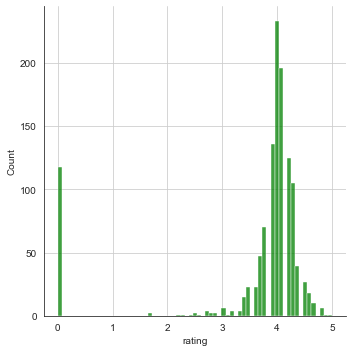

In [69]:
plt.figure(figsize = (6,6))# doubt
sns.set_style('white')
sns.displot(x='rating',data = data,color = 'g')
plt.grid(True)
plt.show()

Observation: from the above plot we can see 4.0 marks the highest .

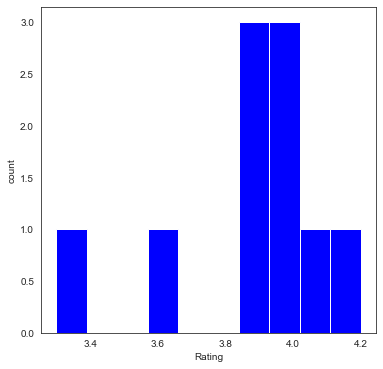

In [75]:
plt.figure(figsize=(6,6))
sns.set_style('white')
plt.hist(data['rating'][:10],bins = 10,color = 'b')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

observation:
    From above plot 3.8 - 4.0 ratings are high.

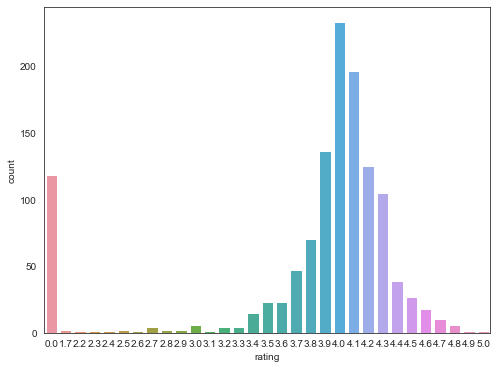

In [76]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.countplot(data['rating'])
plt.show()

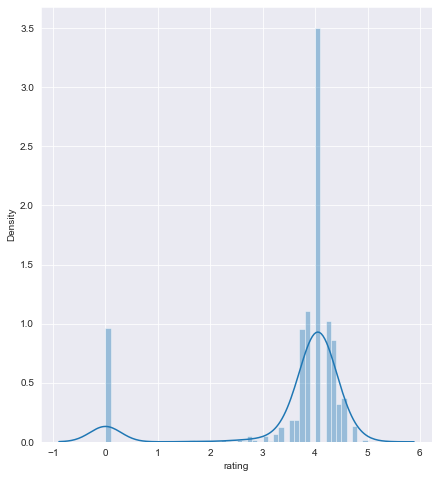

In [73]:
plt.figure(figsize=(7,8))
sns.set_style('dark')
sns.distplot(data['rating'])
plt.grid(True)
plt.show()

Observation: Most of the 4.0 rating restauarants are high .

TIME 

<Figure size 648x504 with 0 Axes>

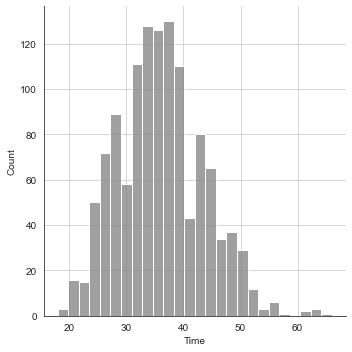

In [70]:
plt.figure(figsize=(9,7))
sns.set_style('white')
sns.displot(x = 'time',data = data,color = 'gray')
plt.xlabel('Time')
plt.grid(True)
plt.show()


Observation: From the above visuals the food deliver take upto 30mins & maximun 40 mins of time to reach . 

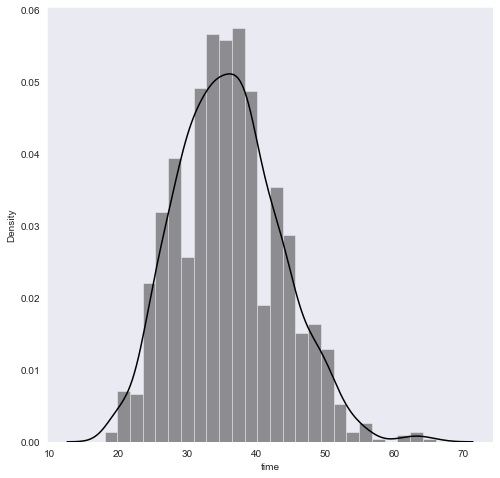

In [74]:
plt.figure(figsize=(8,8))
sns.set_style('dark')
sns.distplot(data['time'],color = 'k')
plt.show()

PRICE FOR TWO

<Figure size 648x360 with 0 Axes>

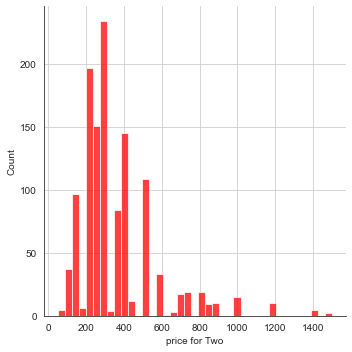

In [71]:
plt.figure(figsize = (9,5))
sns.set_style('white')
sns.displot(x = 'price for Two',data = data,color = 'r')
plt.grid(True)
plt.show()

Observation: From the above plot we can see cost of food is around 300$ for two persons.

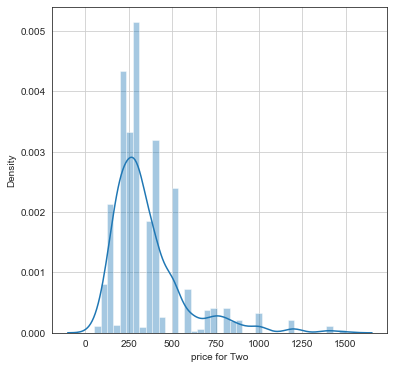

In [72]:
plt.figure(figsize= (6,6))
sns.set_style('white')
sns.distplot(data['price for Two'])
plt.grid(True)
plt.show()

Observation: From the above plot we can see 300$ in most of the Restaurants for two persons.

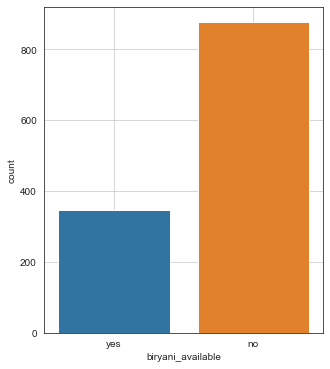

In [77]:
plt.figure(figsize = (5,6))
sns.countplot(data['biryani_available'])
plt.grid(True)
plt.show()

interpretation: from above plot restaurants that serve biryani are less.

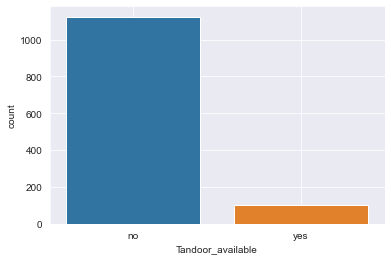

In [79]:
sns.set_style('dark')
sns.countplot(x = 'Tandoor_available',data=data)
plt.grid(True)
plt.show()

interpretation:
    from the above plot Tandoor food is less.

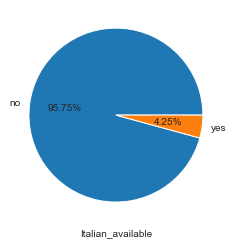

In [80]:
sns.set_style('dark')
plt.pie(data['Italian_available'].value_counts(),labels =data['Italian_available'].value_counts().index,
        autopct ='%.2f%%')
plt.xlabel('Italian_available')
plt.grid(True)
plt.show()

interpretation: form above plot we can see Italian food is less in serves.

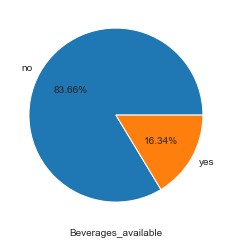

In [81]:
sns.set_style('white')
plt.pie(data['Beverages_available'].value_counts(),labels=data['Beverages_available'].value_counts().index,
       autopct='%.2f%%')
plt.xlabel('Beverages_available')
plt.grid(True)
plt.show()

interpretation: from above plot only 18.33% of Beverages available 

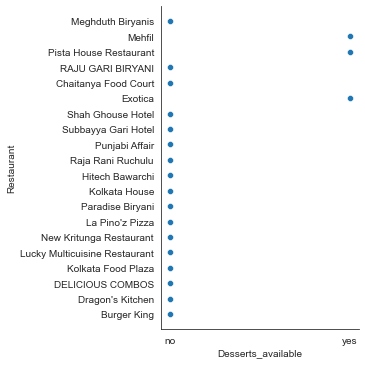

In [82]:
sns.relplot(data['Desserts_available'],data['Restaurant'][:20])

Interpretation : only few Restaurants serves desserts.

# Bivariate 

numerical
 &
categorical visuals


In [83]:
data.groupby('Italian_available').sum()

,rating,price for Two,time
Italian_available,,,
no,4250.9,406337.0,42005.0
yes,194.6,26749.0,2063.0


In [84]:
data.groupby('Tandoor_available').mean()

,rating,price for Two,time
Tandoor_available,,,
no,3.62758,341.733096,35.854093
yes,3.68100,489.780000,37.680000


In [85]:
data.groupby('Desserts_available').mean()

,rating,price for Two,time
Desserts_available,,,
no,3.546059,346.590583,36.376663
yes,3.971660,382.457490,34.526316


In [86]:
table = pd.pivot_table(data,index=['biryani_available','time'],values='rating',aggfunc = {np.mean})
table



mean
biryani_available time          
no                18.0  4.000000
                  19.0  4.050000
                  20.0  4.376923
                  21.0  4.166667
                  22.0  4.275000
...                          ...
yes               55.0  3.750000
                  61.0  3.900000
                  63.0  4.200000
                  64.0  2.100000
                  66.0  3.900000

[77 rows x 1 columns]

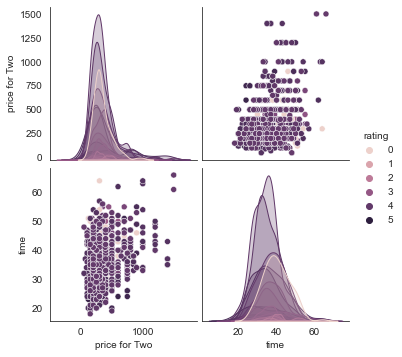

In [87]:
sns.pairplot(data=data,hue ='rating')
plt.show()

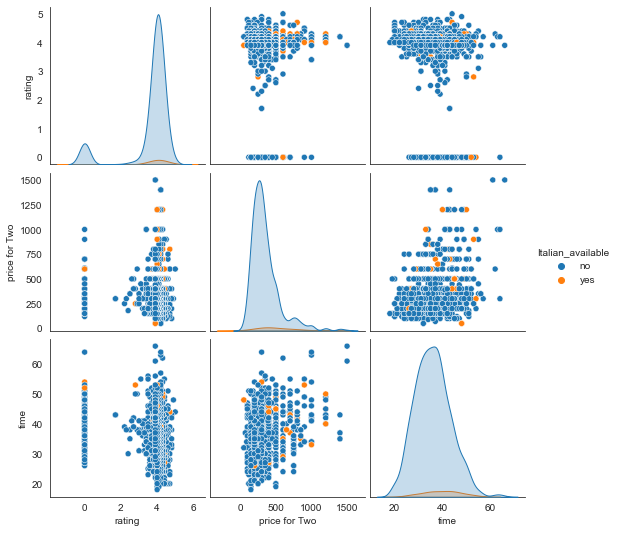

In [88]:
sns.pairplot(data=data,hue ='Italian_available')
plt.show()

Observation : from the above graph we can say most of the restaurants done serve Italian food.

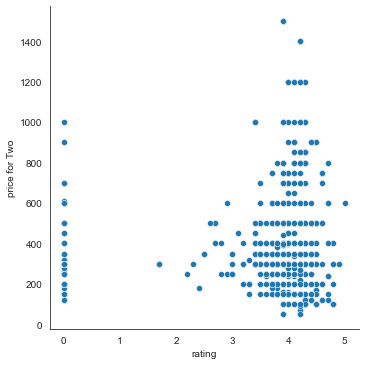

In [89]:
sns.relplot(data['rating'],data['price for Two'])
plt.show()

Observation: The above graph representing a visuals of rating and price of food for two .

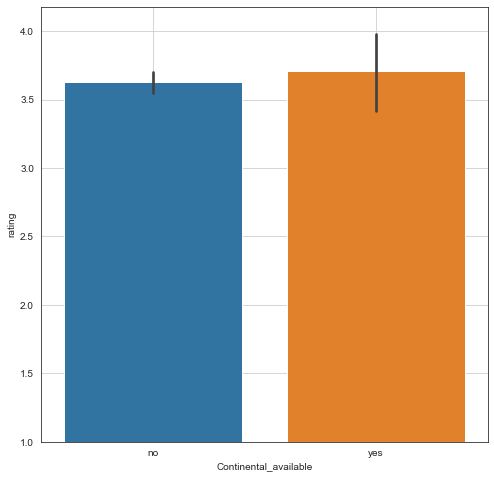

In [78]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.barplot(x ='Continental_available',y='rating',data = data)
plt.ylim(1)
plt.grid(True)

plt.show()

interpretation: from the above plot we can say that most of the restaurants serve continental food but can't be sure as we can see the margin both 'yes' & 'no' have a slight margin.
yes-3.7.
no-3.6.

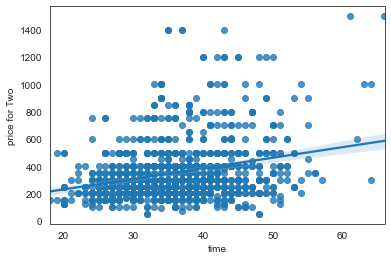

In [90]:
sns.regplot(data['time'],data['price for Two'])
plt.show()

Observation: from the above visuals we can see the change in price for two depending upon the time there is a huge margin .

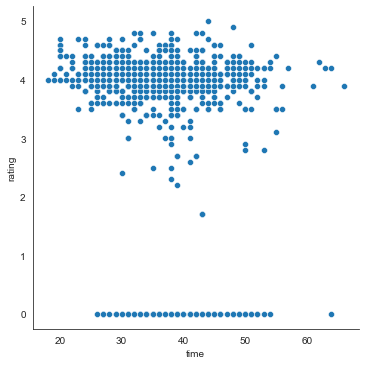

In [91]:
sns.relplot(data['time'],data['rating'])

Observation: From the above graph we can see the most of the plot ends at 4.0 above.

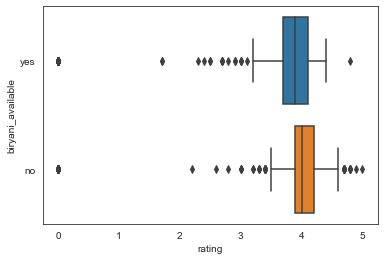

In [92]:
sns.boxplot(x = 'rating',y = 'biryani_available',data= data)
plt.show()

Observation: compared to ratings No is high

# 1)TOP 10 RESTAURANTS BASED ON HIGHEST RATING.

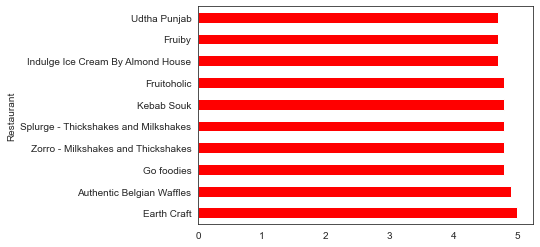

In [93]:
data.groupby(['Restaurant'])['rating'].mean().sort_values(ascending = False)[:10].plot(kind = 'barh',color ='r')
plt.show()

Observation: From the above graph we can say that there is only slight margin for top 10 restaurant .

# 2) price for Two members  in different RESTAURANT.

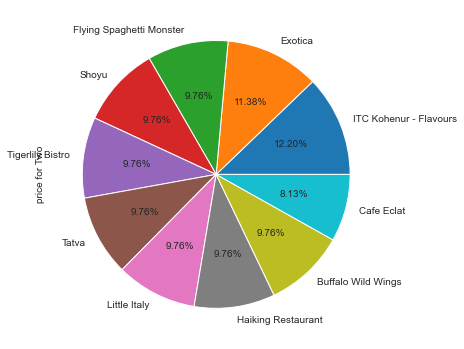

In [94]:
plt.figure(figsize = (6,8))

data.groupby(['Restaurant'])['price for Two'].mean().sort_values(ascending = False)[:10].plot(kind = 'pie',
                                                                                           autopct = '%.2f%%')
plt.show()

Observation: 1) From the below graph we can say ITC Kohenur is highest 12.20% .
The average of the Price for Two(people)  that standby this Restaurants are high compared with other restaurants .

# 3) Mostly available Cuisine.

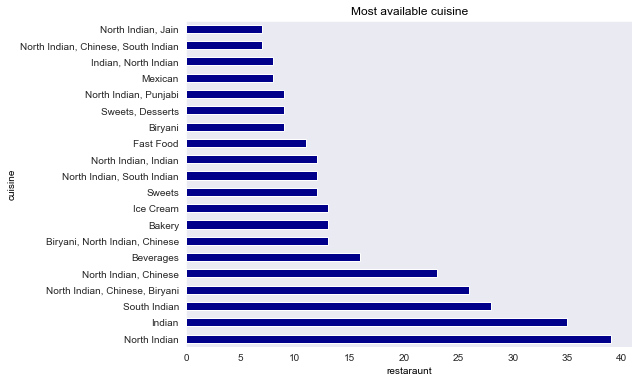

In [95]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
pd.Series(data['cuisine'].value_counts(ascending = False)[:20].plot(kind = 'barh',color = 'darkblue'))
plt.title ('Most available cuisine',color = 'k')
plt.xlabel('restaraunt',color = 'k')
plt.ylabel('cuisine',color = 'k')
plt.show()

Observation: From this graph we can see NorthIndian food is most available food in Hyderabad location.

# 4) Outlets of the Restaurants .

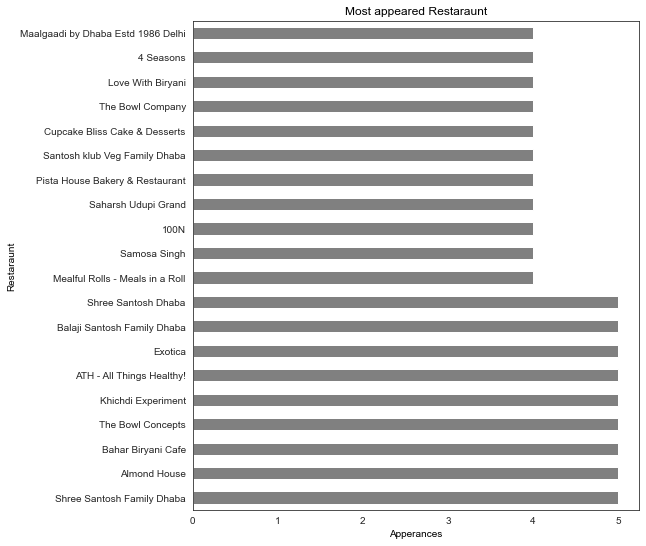

In [96]:
plt.figure(figsize= (8,9))
sns.color_palette('gray')
sns.set_style('white')
pd.Series(data['Restaurant'].value_counts(ascending = False)[:20].plot(kind = 'barh',color = 'grey'))
plt.title('Most appeared Restaraunt',color = 'k')
plt.xlabel('Apperances',color = 'k')
plt.ylabel('Restaraunt',color = 'k')
plt.show()

Observation: we can say that Shree santosh Family Dhaba occurances is highest.

# 5) Highest Ratings. 

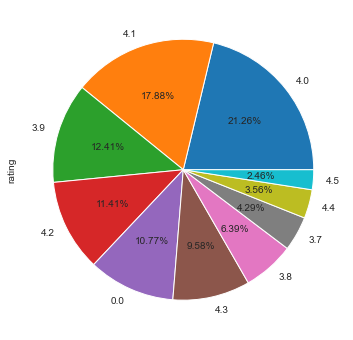

In [97]:
plt.figure(figsize = (8,6))
pd.Series(data['rating'].value_counts(ascending = False).head(10).plot(kind = 'pie',autopct = '%.2f%%'))
plt.show()

Observation: 4.0 is marked highest with 21.26%. 

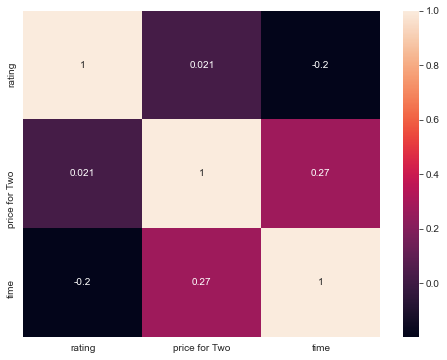

In [98]:
plt.figure(figsize = (8,6))
SWIGGY = data.corr()
sns.heatmap(SWIGGY,annot=True)
plt.show()

Observation: rating and time ends up at -0.2 which is low.
    price for two with rating marked at 0.021 along with 0.27 in time which is a positive marking.
    as we see the time ,price for two & rating marks at 1 self.